In [1]:
# coding: utf-8

#초기조건설정
import pandas as pd
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib
from __future__ import print_function
%matplotlib inline

rcParams['font.family'] = 'NanumGothic'
rcParams.update({'font.size': 12})
matplotlib.style.use('ggplot')
sns.set_style("whitegrid")

In [27]:
def movieLensDataLoad():
    ## user 영화 별점 data 
    encoding='latin1'
    unames = ['user_id','gender','age','occupation','zip']
    rnames = ['user_id','movie_id','rating','timestamp']
    mnames = ['movie_id','title','genres']
    
    ratings = pd.read_csv("movielens/ratings.dat",sep='::',header=None,names=rnames,encoding=encoding)
    movies = pd.read_csv("movielens/movies.dat",sep='::',header=None,names=mnames,encoding=encoding)
    users = pd.read_csv("movielens/users.dat",sep='::',header=None,names=unames,encoding=encoding)
    return ( ratings, movies, users )

In [33]:
ratings,movies,users = movieLensDataLoad()

C:\Users\Xnote\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Xnote\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\Xnote\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load

In [34]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [36]:
rating.describe()

,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [43]:
user_rating_count = ratings.groupby(['user_id'])['rating'].count()

In [44]:
user_rating_count

user_id
1        53
2       129
3        51
4        21
5       198
6        71
7        31
8       139
9       106
10      401
11      137
12       23
13      108
14       25
15      201
16       35
17      211
18      305
19      255
20       24
21       22
22      297
23      304
24      136
25       85
26      400
27       70
28      107
29      108
30       43
       ... 
6011    197
6012     23
6013    124
6014    106
6015     57
6016    909
6017     33
6018    159
6019     89
6020     43
6021    132
6022     48
6023    147
6024     95
6025    271
6026     81
6027     36
6028     47
6029     31
6030    115
6031     51
6032    104
6033     60
6034     21
6035    280
6036    888
6037    202
6038     20
6039    123
6040    341
Name: rating, dtype: int64

유저당 별점 매긴수(mean): 165.5975165562914
유저당 별점 매긴수(median): 96.0
유저당 별점 매긴수(skew): 2.74464777726


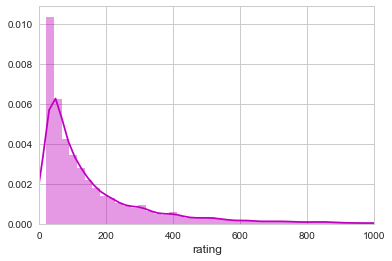

In [64]:
print("유저당 별점 매긴수(mean):", user_rating_count.mean())
print("유저당 별점 매긴수(median):",user_rating_count.median()) 
print("유저당 별점 매긴수(skew):",user_rating_count.skew()) 

ax = sns.distplot(user_rating_count, color="m",bins=100)
plt.xlim(0,1000)
plt.show()

In [47]:
user_rating_count.sort()
user_rating_count.head(100)

C:\Users\Xnote\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  """Entry point for launching an IPython kernel.


user_id
947     20
4068    20
2530    20
341     20
5258    20
4383    20
98      20
4393    20
2061    20
2584    20
4398    20
5525    20
665     20
4419    20
5533    20
2673    20
2696    20
3633    20
5145    20
2714    20
2759    20
2819    20
1993    20
4463    20
4775    20
2037    20
5904    20
2111    20
4365    20
5027    20
        ..
4749    20
5725    20
3222    20
4525    20
5828    20
3407    20
3530    20
5159    20
3021    20
6038    20
3552    20
932     20
703     20
5216    20
3376    20
708     20
317     21
653     21
5804    21
318     21
3388    21
3234    21
2234    21
3225    21
1363    21
4943    21
2422    21
1431    21
1549    21
226     21
Name: rating, dtype: int64

영화당 별점 받은수(mean): 269.88909875876953
영화당 별점 받은수(median): 123.5
영화당 별점 받은수(skew): 2.81493596238


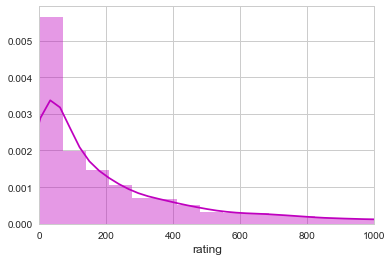

In [59]:
movie_rating_count = ratings.groupby(['movie_id'])['rating'].count()
print("영화당 별점 받은수(mean):",movie_rating_count.mean()) 
print("영화당 별점 받은수(median):",movie_rating_count.median()) 
print("영화당 별점 받은수(skew):",movie_rating_count.skew()) 

#movie_rating_count[movie_rating_count>900]=900
ax = sns.distplot(movie_rating_count, color="m",bins=50)
plt.xlim(0,1000); plt.show()

In [60]:
movie_rating_count.sort()

C:\Users\Xnote\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  """Entry point for launching an IPython kernel.


In [62]:
print("별점 평가수가 5개 미만인 영화 : {0} / {1}".format(
        movie_rating_count[movie_rating_count<5].count()
        ,movie_rating_count.count()))
## 별점 평가시 영화의 별점 평가수별 Error율을 측정해 볼 필요가 있음 

별점 평가수가 5개 미만인 영화 : 290 / 3706
